## Introduction
Feature selection plays a key role in data prepocessing, in order to reduce complexity, prevent overfitting of machine learning models and to reduce runtime. Furthermore, feature selection delivers insights into the systematic variation in the data, which is crucial in domains that rely on model interpretability, such as life sciences. UBayFS is an ensemble feature selection technique, embedden in a Bayesian statistical framework. With our approach we combine data and user knowledge, where the first is extracted from data driven ensemble feature selection techniques. The user can control the feature selection by assigning prior weights to features and penalizing specific feature combinations. Also, the user can define a maximal number of selected features and mustlink-constraints (features must be selected together) or cannotlink-constraints (features must not be selected together). A parameter $\rho$ regulates the penalty strength --- violation of constraints can be valid but leads to a lower probability of the feature set that is derived from the violaed constraints.

The UBayFS package implements the framework proposed in linktopaper, together with an interactive Shiny dashbord, which makes UBayFS applicable to R-users as well as non R-users. In this documentation we use the Wisconsin breast cancer dataset (reference) for demonstration. Specifically, the dataset consists of 569 samples and 30 features, and can be downloaded from ..link.. with the UBay function ``loadWisconsin()``. The features are derived from 10 characteristics, where each characteristic is represented by 3 summary statistics in the dataset. Thus, the characteristic *radius* results in features *radius mean*, *radius standard deviation* and *radius worst*.


In [1]:
library(UBayFS)
demo = loadWisconsin()

## Background
summary of theory chapter paper
ensemble multinomial, formeln

## Ensemble Training
step by step build ubay model funktion beschreiben

In [2]:
model = build.UBaymodel(data = demo$data,
                        target = demo$labels,
                        M = 100, 
                        tt_split = 0.75,
                        nr_features = 10,
                        method = "mRMR")
summary(model)

 UBayFS model summary 
  data:  569x30 
  labels:  B: 357 M: 212 

   === prior weights === 
  weights: ( 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 ) 

  === likelihood === 
  ensemble counts: ( 0,12,62,0,0,0,100,100,0,0,0,0,7,100,0,0,12,1,0,0,100,87,100,100,3,15,100,100,1,0 ) 

  === feature selection results === 
  MAP:  no output produced yet  


## User knowledge

In [3]:
weights = rep(c(10,15,20,16,15,10,12,17, 21,14), 3)
print(weights)

model = setWeights(model=model, weights = weights)

 [1] 10 15 20 16 15 10 12 17 21 14 10 15 20 16 15 10 12 17 21 14 10 15 20 16 15
[26] 10 12 17 21 14


In [4]:
constraints = buildConstraints(constraint_types = c("max_size", "must_link", rep("cannot_link", 2)),
                               constraint_vars = list(10, # max_size
                                                      c(1,11,21), # must_link
                                                      c(1,10), # cannot_link
                                                      c(20,23,24) #cannot_link
                                                      ),
                               num_features = ncol(model$data),
#                                rho = c(Inf, # max_size
#                                        0.1, # must_link
#                                        1, # cannot_link
#                                        1) # cannot_link
rho=1
)
# )
print(constraints)

model = setConstraints(model = model, A = constraints$A, b = constraints$b, rho = constraints$rho)

$A
  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
     1    1    1    1    1    1    1    1    1     1     1     1     1     1
2   -1    0    0    0    0    0    0    0    0     0     1     0     0     0
3   -1    0    0    0    0    0    0    0    0     0     0     0     0     0
4    1    0    0    0    0    0    0    0    0     0    -1     0     0     0
6    0    0    0    0    0    0    0    0    0     0    -1     0     0     0
7    1    0    0    0    0    0    0    0    0     0     0     0     0     0
8    0    0    0    0    0    0    0    0    0     0     1     0     0     0
     1    0    0    0    0    0    0    0    0     1     0     0     0     0
     0    0    0    0    0    0    0    0    0     0     0     0     0     0
  [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26] [,27]
      1     1     1     1     1     1     1     1     1     1     1     1     1
2     0     0     0     0     0     0     0     0     0     0     0

## Optimization and evaluation
- train function with GA
- print/summary/plot

In [5]:
model = setOptim(model = model, popsize = 100, maxiter = 200)

 UBayFS model summary 
  data:  569x30 
  labels:  B: 357 M: 212 

  === prior information === 
 constraint 1: ( 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1 ) x <= 10; rho = 1 
 constraint 2: ( -1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 3: ( -1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 4: ( 1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 5: ( 0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 6: ( 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 7: ( 0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0 ) x <= 0; rho = 1 
 constraint 8: ( 1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 ) x <= 1; rho = 1 
 constraint 9: ( 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0 ) x <= 1; rho = 1

  === prior weights === 
  weight

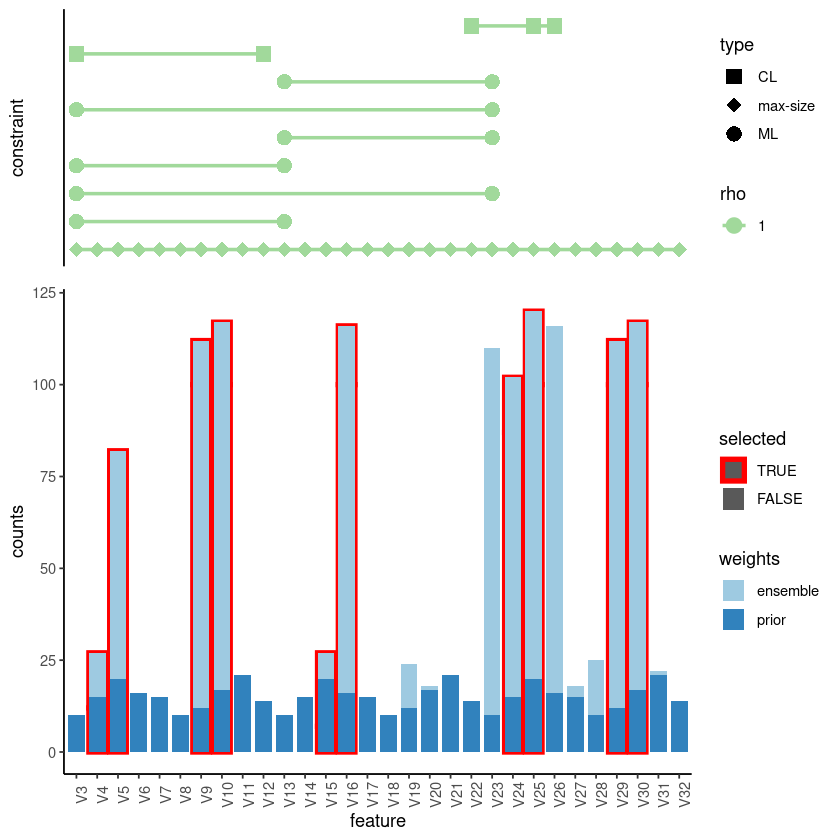

In [6]:
model = train(x = model)
summary(model)
plot(model)

## Shiny dashboard

<img src="UBay_Shiny_Screenshot.png">